In [4]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df = pd.read_csv(r'E:\Full Data Science Projects\Bootcamp test\dataset\dataset.csv')

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 1. EDA 📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">

In [6]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 13392
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12205 non-null  int64  
 1   title                         12205 non-null  object 
 2   url                           12205 non-null  object 
 3   is_paid                       12205 non-null  bool   
 4   num_subscribers               12205 non-null  int64  
 5   avg_rating                    12205 non-null  float64
 6   avg_rating_recent             12205 non-null  float64
 7   rating                        12205 non-null  float64
 8   num_reviews                   12205 non-null  int64  
 9   is_wishlisted                 12205 non-null  bool   
 10  num_published_lectures        12205 non-null  int64  
 11  num_published_practice_tests  12205 non-null  int64  
 12  created                       12205 non-null  object 
 13  publis

In [10]:
df['title'].value_counts()

title
Project Management Fundamentals                             2
Learn Machine Learning From Scratch                         2
Performance Management                                      2
Cold Calling Mastery                                        2
Practice the IIBA CBAP Exam: 240 Quality Questions, 2020    2
                                                           ..
The Agile Bootcamp: Agile Delivery | Agile Case Studies     1
Successfully Transitioning Into Supervision                 1
Sales Training: Master Your Sales Pitch                     1
eBay Selling Home Business Powerseller Secrets and Hacks    1
A Matemática para investir                                  1
Name: count, Length: 12174, dtype: int64

In [11]:
df['title'] =df['title'].apply(lambda x: x.lower()) 
df['title'] = df['title'].str.replace('^a-z0-9\s', '')
df['title'].value_counts()

title
interpreting financial statements                               3
introducción a la contabilidad                                  3
lean six sigma white belt                                       2
shopify dropshipping - scale to 7 figures with clickfunnels!    2
shopify dropshipping masterclass                                2
                                                               ..
the agile bootcamp: agile delivery | agile case studies         1
successfully transitioning into supervision                     1
sales training: master your sales pitch                         1
ebay selling home business powerseller secrets and hacks        1
a matemática para investir                                      1
Name: count, Length: 12163, dtype: int64

In [13]:
columns_to_drop = [
    'id', 'avg_rating', 'url', 'created', 'num_published_lectures', 
    'discount_price__currency', 'discount_price__amount', 'published_time', 
    'is_paid',  'discount_price__price_string', 
    'price_detail__currency', 'price_detail__price_string' , 'avg_rating_recent'
]

df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df.head()

,title,num_subscribers,rating,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount
0,the complete sql bootcamp 2020: go from zero t...,295509,4.67874,78006,False,0,8640.0
1,tableau 2020 a-z: hands-on tableau training fo...,209070,4.60015,54581,False,0,8640.0
2,pmp exam prep seminar - pmbok guide 6,155282,4.59326,52653,False,2,8640.0
3,the complete financial analyst course 2020,245860,4.53772,46447,False,0,8640.0
4,an entire mba in 1 course:award winning busine...,374836,4.47173,41630,False,0,8640.0


In [15]:
rating = df['rating']
df.drop(columns=['rating'], inplace=True)
df['rating'] = rating
df.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount,rating
0,the complete sql bootcamp 2020: go from zero t...,295509,78006,False,0,8640.0,4.67874
1,tableau 2020 a-z: hands-on tableau training fo...,209070,54581,False,0,8640.0,4.60015
2,pmp exam prep seminar - pmbok guide 6,155282,52653,False,2,8640.0,4.59326
3,the complete financial analyst course 2020,245860,46447,False,0,8640.0,4.53772
4,an entire mba in 1 course:award winning busine...,374836,41630,False,0,8640.0,4.47173


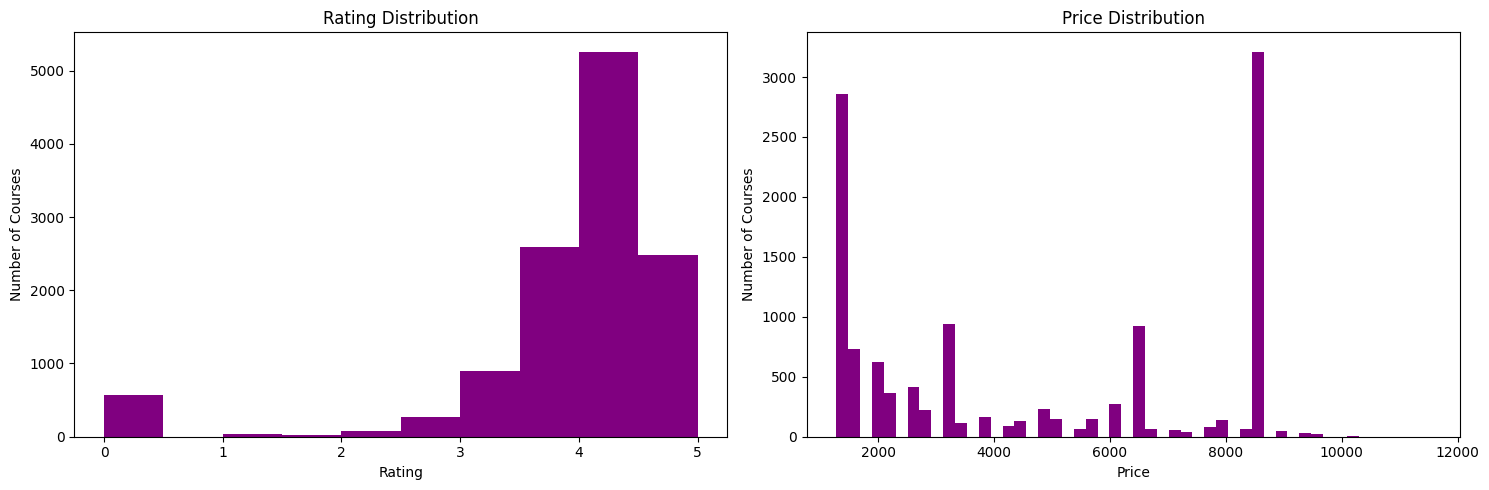

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(df['rating'], bins = 10, color= 'purple')
ax[0].set_title('Rating Distribution')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Number of Courses')

ax[1].hist(df['price_detail__amount'], bins =50, color= 'purple')
ax[1].set_title('Price Distribution')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Number of Courses')

plt.tight_layout()
plt.show()

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 2. Data Preprocessing 📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['title'] = le.fit_transform(df['title'])
df['is_wishlisted'] = le.fit_transform(df['is_wishlisted'])

In [20]:
df.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount,rating
0,10853,295509,78006,0,0,8640.0,4.67874
1,10395,209070,54581,0,0,8640.0,4.60015
2,8485,155282,52653,0,2,8640.0,4.59326
3,10765,245860,46447,0,0,8640.0,4.53772
4,818,374836,41630,0,0,8640.0,4.47173


In [21]:
scaler = StandardScaler()
X = df.drop(columns=['rating'])
y = df['rating']

X['num_subscribers'] = scaler.fit_transform(X[['num_subscribers']])
X['num_reviews'] = scaler.fit_transform(X[['num_reviews']])
X['price_detail__amount'] = scaler.fit_transform(X[['price_detail__amount']])

In [24]:
X.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount
0,10853,30.941634,47.424010,0,0,1.328989
1,10395,21.802528,33.137395,0,0,1.328989
2,8485,16.115579,31.961532,0,2,1.328989
3,10765,25.692297,28.176570,0,0,1.328989
4,818,39.328795,25.238742,0,0,1.328989


<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 3. Fitting our Model📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.2790404290193483
Mean Absolute Error: 0.37700820835608956
R2 Score: 0.7295539741074113


In [30]:
# feature importance
importances = rf.feature_importances_
importances

array([0.09981148, 0.08143884, 0.78458966, 0.        , 0.00545156,
       0.02870846])